<a href="https://colab.research.google.com/github/praths007/tensorflow_certification/blob/master/coursera_practise/NLP_week4_text_generation_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
import tensorflow
import numpy as np
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAvgPool1D, LSTM, Bidirectional, Embedding, Flatten
from tensorflow.keras.utils import to_categorical

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt



--2020-08-18 09:15:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 108.177.112.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-18 09:15:29 (111 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [6]:
sonnets = []
with open("/tmp/sonnets.txt", 'r') as sonnet_text:
  for line in sonnet_text:
    sonnets.append(line.lower().split('\n')[0])

In [7]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sonnets)

train_sonnet = []
for line in sonnets:
  seq = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(seq)):
    train_sonnet.append(seq[:i+1])


In [8]:
maxlen = max([len(s) for s in train_sonnet])
sonnet_padded = pad_sequences(train_sonnet, maxlen=maxlen, padding="pre")

In [9]:
sonnet = sonnet_padded[:,:-1]
labels = sonnet_padded[:,-1]

In [10]:
labels = tf.keras.utils.to_categorical(labels)
sonnet = np.array(sonnet)
labels = np.array(labels)

In [11]:
labels.shape

(15462, 3211)

In [12]:
model = Sequential([
                    Embedding(10000, 64, input_length=sonnet.shape[1]),
                    Bidirectional(LSTM(64, return_sequences=True)),
                    Bidirectional(LSTM(64)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(labels.shape[1], activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 128)           66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              414219    
Total params: 1,235,595
Trainable params: 1,235,595
Non-trainable params: 0
______________________________________________

In [14]:
# adam_opt=tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(sonnet, labels, epochs=100)

Epoch 1/100
484/484 [==============================] - 12s 24ms/step - loss: 6.8609 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 12s 24ms/step - loss: 6.4784 - accuracy: 0.0260
Epoch 3/100
484/484 [==============================] - 12s 24ms/step - loss: 6.3066 - accuracy: 0.0323
Epoch 4/100
484/484 [==============================] - 12s 24ms/step - loss: 6.1642 - accuracy: 0.0367
Epoch 5/100
484/484 [==============================] - 12s 24ms/step - loss: 6.0243 - accuracy: 0.0427
Epoch 6/100
484/484 [==============================] - 12s 24ms/step - loss: 5.8733 - accuracy: 0.0429
Epoch 7/100
484/484 [==============================] - 12s 25ms/step - loss: 5.7060 - accuracy: 0.0477
Epoch 8/100
484/484 [==============================] - 12s 24ms/step - loss: 5.5321 - accuracy: 0.0534
Epoch 9/100
484/484 [==============================] - 12s 24ms/step - loss: 5.3617 - accuracy: 0.0574
Epoch 10/100
484/484 [==============================] - 12s 24ms/step - l

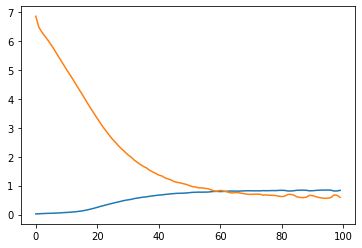

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])